In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv ("C:/Users/HP/OneDrive/Desktop/Chun analysis/Customer chun.csv")
df = pd.DataFrame(data)
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
#for replacement of blank with 0
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
#for conversion of datatype
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [17]:
#to check whether the value is null
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()
#for overall sum
df.isnull().sum().sum()

0

In [21]:
df.describe(include='all')
#for summary of data (short form)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [22]:
df.duplicated().sum()

0

In [23]:
#to check individual data
df["customerID"].duplicated().sum()

0

In [3]:
#converted 0 and 1 value of senior citizen to make data understandable
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

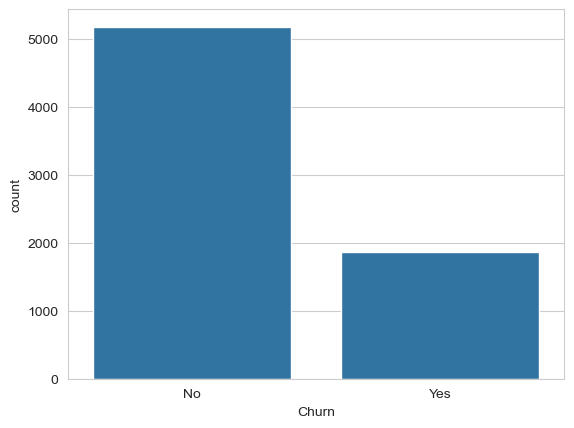

In [4]:
sns.countplot(x='Churn', data=df)
plt.show()

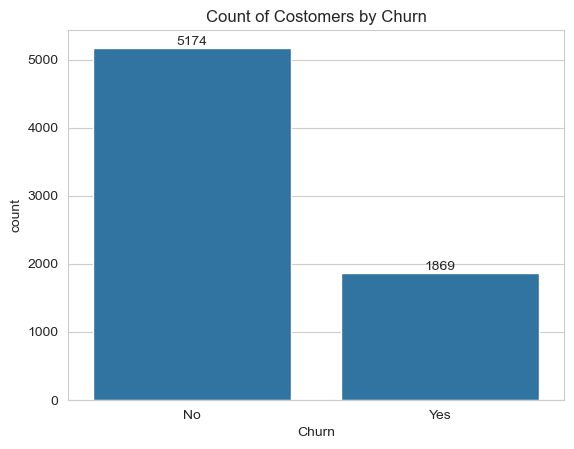

In [5]:
#for count show
ax = sns.countplot(x='Churn', data=df)


ax.bar_label(ax.containers[0])
plt.title("Count of Costomers by Churn")
plt.show()

In [6]:
#we should group by
gb = df.groupby('Churn').agg({"Churn":"count"})
print(gb)

       Churn
Churn       
No      5174
Yes     1869


       Churn
Churn       
No      5174
Yes     1869


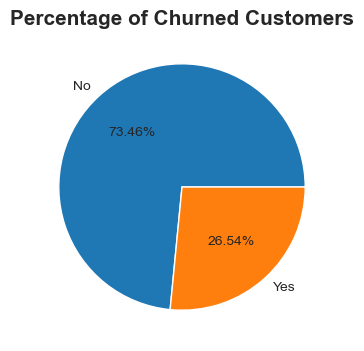

In [7]:
#for_percent after group by
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({"Churn":"count"})
print(gb)
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title("Percentage of Churned Customers",fontsize=15, fontweight='bold')
plt.show()

From the given pie chart we can conclude that 26.54% of our customers have churned out. 
#Now lets_explore the reason behind it.

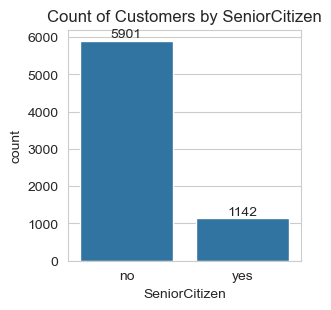

In [8]:
plt.figure(figsize=(3,3))
ax = sns.countplot(x = "SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

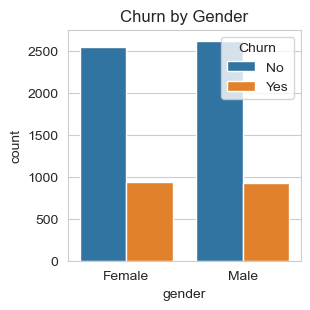

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x = "gender", data=df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

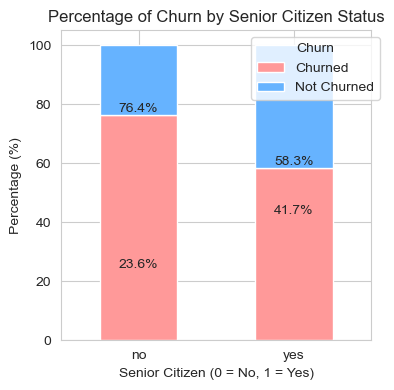

In [10]:
# Calculate counts of churn for each SeniorCitizen status
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
plt.figure(figsize=(4, 4))
percent_data.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'], ax=plt.gca())

# Adding labels and title
plt.title("Percentage of Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn", labels = ["Churned", "Not Churned"], loc='upper right', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)

# Adding percentage labels on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout for better fit
plt.show()

Comparatively a greater percentage of people in senior citizen category have churned out.

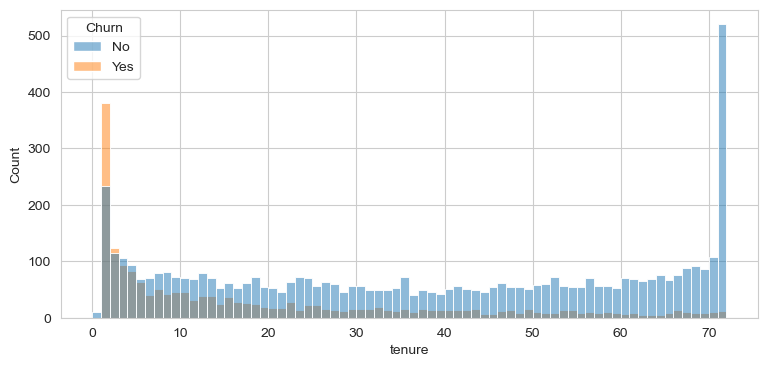

In [11]:
plt.figure(figsize=(9,4))
sns.histplot(x  = "tenure", data = df,bins= 72,hue = "Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned


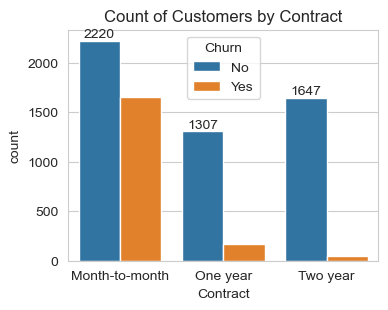

In [12]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x = "Contract", data=df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract


In [13]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

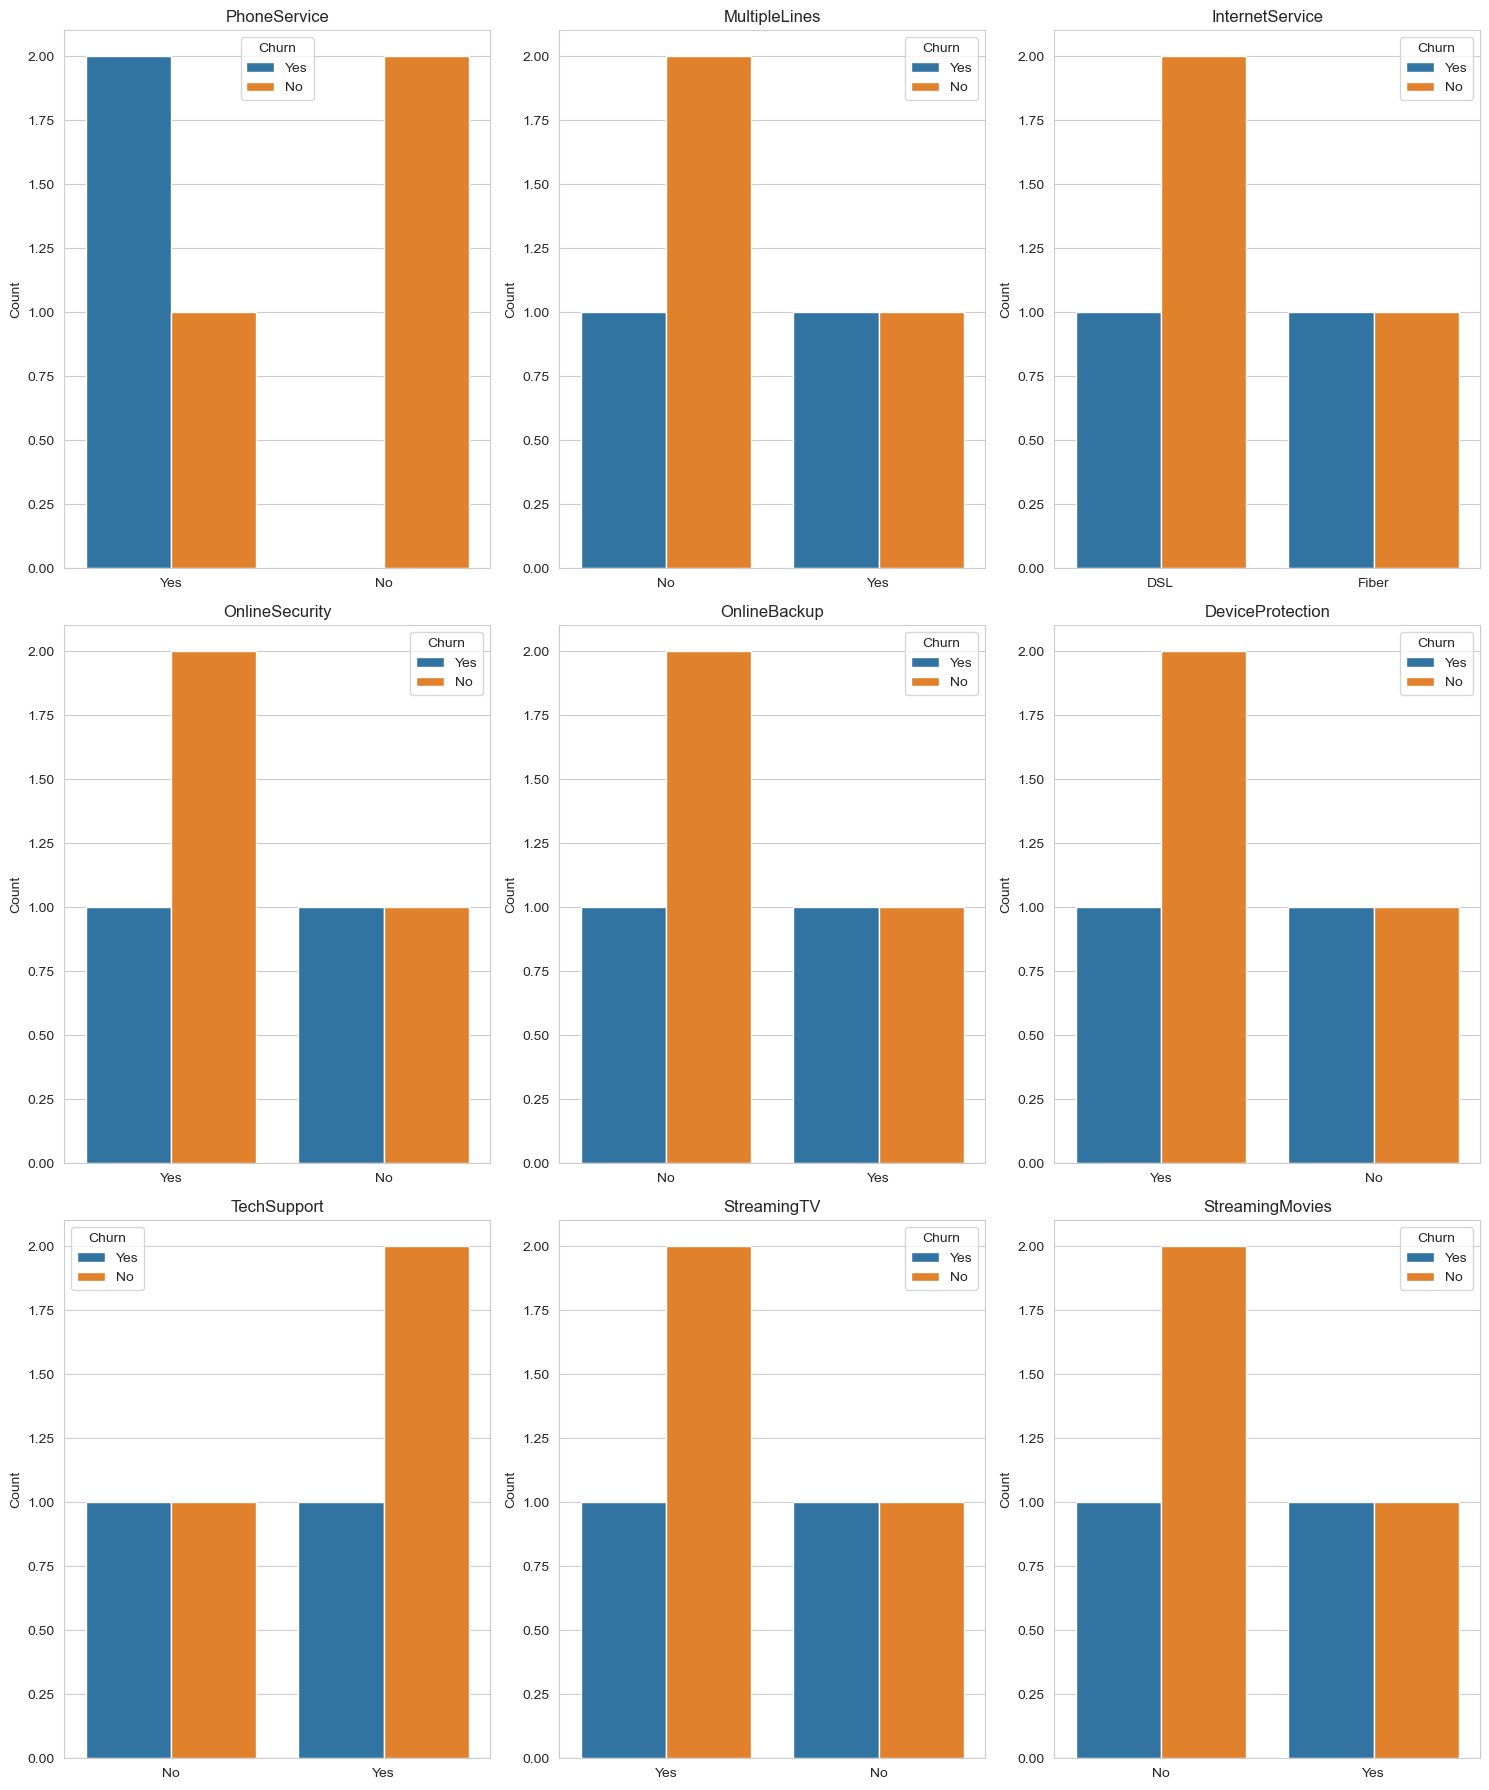

In [14]:
# Example DataFrame (with a Churn column)
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber', 'DSL', 'Fiber', 'DSL'],
    'OnlineSecurity': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'OnlineBackup': ['No', 'Yes', 'No', 'Yes', 'No'],
    'DeviceProtection': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'TechSupport': ['No', 'Yes', 'No', 'Yes', 'Yes'],
    'StreamingTV': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'StreamingMovies': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Churn': ['Yes', 'No', 'No', 'Yes', 'No']  # Churn column added
}

df = pd.DataFrame(data)

# Define the features for which you want count plots
features = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplots
n = len(features)
fig, axes = plt.subplots(nrows=(n + 2) // 3, ncols=3, figsize=(15, n * 2))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create count plots for each feature with hue
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


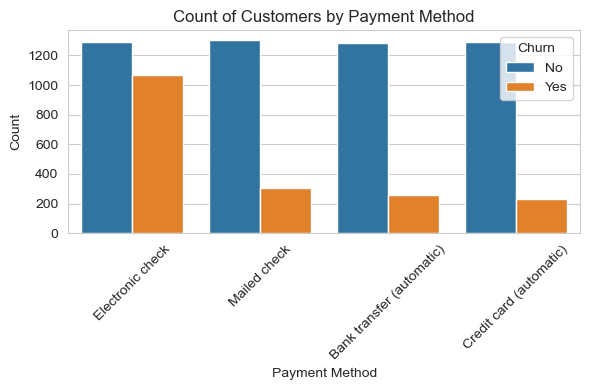

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Chun analysis/Customer chun.csv")
df = pd.DataFrame(data)

# Create a count plot for the PaymentMethod column
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PaymentMethod' , hue='Churn')
plt.title('Count of Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


Customer is likely to churn when he is using electronic check as a payment method.
